Description
Context
There is a huge demand for used cars in the Indian Market today. 
As sales of new cars have slowed down in the recent past, 
the pre-owned car market has continued to grow over the past years and is 
larger than the new car market now. 
Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. 
There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. 
In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. 
Unlike new cars, where price and supply are fairly deterministic and managed by OEMs 
(Original Equipment Manufacturer / except for dealership level discounts which come into 
play only in the last stage of the customer journey), used cars are very different beasts with 
huge uncertainty in both pricing and supply. 
Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. 
For example, if the business knows the market price, it will never sell anything below it.

 

Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 

Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

S.No.: Serial number
Name: Name of the car which includes brand name and model name
Location: Location in which the car is being sold or is available for purchase (cities)
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
Price: The price of the used car in INR Lakhs
 

Best Practices for Notebook
The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb).
 

Submission Guidelines
The submission should be a well-commented Jupyter notebook [format - .html]
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation.
Submission will not be evaluated if
it is submitted post-deadline, or,
more than 1 file is submitted.
 

Happy Learning!

# 1. Loading libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)
# To build linear model for prediction
from sklearn.linear_model import LinearRegression
# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# To suppress warnings
import warnings

warnings.filterwarnings('ignore')

# 2. Loading and exploring the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [3]:
df = pd.read_csv("used_cars_data.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50


In [3]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


In [5]:
df.Owner_Type.value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [6]:
df.Location.value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [9]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [11]:
df.Transmission.value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [13]:
df.Seats.value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [5]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.3+ KB


In [22]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


### Check categorical variables that can me transformed
### Use column_name.count_values()

In [5]:
df = df[~df['Seats'].isnull()]

# Y contained some other garbage, so null check was not enough
# df = df[df['Seats'].str.isnumeric()]

# final conversion now worked
# df[['x']] = df[['x']].astype(int)
df[['Seats_as_float']] = df[['Seats']].astype(int)

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,5
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,7
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,5


In [6]:
df.sort_values(by=['Seats_as_float'], ascending=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float
S.No.,,,,,,,,,,,,,,
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,0.0,53.14,18.00,0
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,49.49,55.54,2
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,49.49,55.00,2
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,11.30,120.00,2
4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1 kmpl,5461 CC,387.3 bhp,2.0,49.49,29.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07 kmpl,1978 CC,83.1 bhp,10.0,7.63,5.25,10
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,24.01,3.65,10
6875,Toyota Qualis FS B3,Pune,2002,119613,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,24.01,NaN,10


In [7]:
# If I choose to drop rows with null target value.
data = df.drop(df[pd.isnull(df['Price'])].index)

In [8]:
cat_vars = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for colname in cat_vars:
    data[colname] = data[colname].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5977 non-null   object  
 1   Location           5977 non-null   category
 2   Year               5977 non-null   int64   
 3   Kilometers_Driven  5977 non-null   int64   
 4   Fuel_Type          5977 non-null   category
 5   Transmission       5977 non-null   category
 6   Owner_Type         5977 non-null   category
 7   Mileage            5975 non-null   object  
 8   Engine             5977 non-null   object  
 9   Power              5874 non-null   object  
 10  Seats              5977 non-null   float64 
 11  New_Price          5977 non-null   float64 
 12  Price              5977 non-null   float64 
 13  Seats_as_float     5977 non-null   int64   
dtypes: category(4), float64(3), int64(3), object(4)
memory usage: 537.9+ KB


In [9]:
def string_value_to_num(value):
    """This function takes in a string representing a salary in Euros
    and converts it to a number. For example, '€220K' becomes 220000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(value, str):  # checks if `engine_cc_value` is a string
        no_space_value = value.strip() # Remove the white space at the beginning and at the end
        arr_values = no_space_value.split()
        # Get the first value from the splitted string list
        return pd.to_numeric(arr_values[0])
    else:  # this happens when the current income is np.nan
        return np.nan

In [10]:
# for colname in money_cols:
colnames = [ 'Engine', 'Power', 'Mileage']
for colname in colnames:
    data[colname] = data[colname].apply(string_value_to_num)
    
data[colnames].head()  # good to go!

,Engine,Power,Mileage
S.No.,,,
0,998,58.16,26.60
1,1582,126.20,19.67
2,1199,88.70,18.20
3,1248,88.76,20.77
4,1968,140.80,15.20


In [11]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,5.51,1.75,5
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,16.06,12.50,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50,5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00,7
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,53.14,17.74,5


In [13]:
data.isnull().sum().sort_values(ascending=False)

Power                103
Mileage                2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Engine                 0
Seats                  0
New_Price              0
Price                  0
Seats_as_float         0
dtype: int64

### Name

In [14]:
def car_brand(value):
    """This function takes in a string representing a salary in Euros
    and converts it to a number. For example, '€220K' becomes 220000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(value, str):  # checks if `engine_cc_value` is a string
        no_space_value = value.strip() # Remove the white space at the beginning and at the end
        arr_values = no_space_value.split()
        # Get the first value from the splitted string list
        return arr_values[0].lower()
    else:  # this happens when the current income is np.nan
        return np.nan

In [15]:
data['Car_brand'] = data['Name'].apply(car_brand)

In [18]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float,Car_brand
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,5.51,1.75,5,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,16.06,12.50,5,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50,5,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00,7,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,53.14,17.74,5,audi


### Seats

Check the value to decide which imputation function will make more sense to use.

In [16]:
data[~data.Seats.isnull()].sort_values(by=['Car_brand'])[['Car_brand', 'Seats']]

,Car_brand,Seats
S.No.,,
1221,ambassador,5.0
2114,audi,5.0
2165,audi,5.0
4502,audi,7.0
423,audi,5.0
...,...,...
4429,volvo,5.0
1511,volvo,5.0
5583,volvo,5.0


In [17]:
seat_mode_value_df = data.groupby(['Car_brand'])[['Seats']].median()
seat_mode_value_df.head()

,Seats
Car_brand,
ambassador,5.0
audi,5.0
bentley,4.0
bmw,5.0
chevrolet,5.0


In [19]:
# Impute the missing Seats data using group median values
data['Seats'] = data.Seats.fillna(value = data.groupby(['Car_brand'])['Seats'].transform('median'))

In [20]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                 0
Power                103
Seats                  0
New_Price              0
Price                  0
Seats_as_float         0
Car_brand              0
dtype: int64

## Mileage
Check what is going on with the two missing values

In [21]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float,Car_brand
S.No.,,,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41.0,5.0,13.58,13.00,5,mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73.0,5.0,24.01,12.75,5,toyota


See if the missing values for Mileage have something to do with Fuel_Type

In [22]:
data.Fuel_Type.value_counts()

Diesel      3195
Petrol      2714
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

Observation
- Seems like the missing values for mileage has a relationship with Fuel_Type.
- Since there are only two instances there is nothing other than droping these instances that can be done.

In [23]:
data.drop(data[data['Mileage'].isnull()].index, inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float,Car_brand
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,5.51,1.75,5,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,16.06,12.50,5,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50,5,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00,7,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,53.14,17.74,5,audi


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5975.0,2013.386778,3.247238,1998.00,2012.00,2014.00,2016.00,2019.00
Kilometers_Driven,5975.0,58674.314979,91558.514361,171.00,33908.00,53000.00,73000.00,6500000.00
Mileage,5975.0,18.179408,4.521801,0.00,15.20,18.16,21.10,33.54
Engine,5975.0,1621.606695,601.036987,624.00,1198.00,1493.00,1984.00,5998.00
Power,5872.0,113.276894,53.881892,34.20,75.00,97.70,138.10,560.00
Seats,5975.0,5.278828,0.808959,0.00,5.00,5.00,5.00,10.00
New_Price,5975.0,21.479935,24.263327,3.91,7.88,11.30,21.77,375.00
Price,5975.0,9.501647,11.205736,0.44,3.50,5.65,9.95,160.00
Seats_as_float,5975.0,5.278828,0.808959,0.00,5.00,5.00,5.00,10.00


Kilometers_driven and Engine, Power and Price need more exploration.

### Kilometers_driven

In [25]:
data.groupby(['Year','Car_brand'])['Kilometers_Driven'].median()

Year  Car_brand    
1998  maruti            95150.0
      mercedes-benz     55300.0
1999  honda            140000.0
      maruti            70000.0
2000  mahindra         124000.0
                         ...   
2019  renault            7213.0
      skoda             17480.5
      tata              16698.0
      toyota            24894.0
      volkswagen         1000.0
Name: Kilometers_Driven, Length: 315, dtype: float64

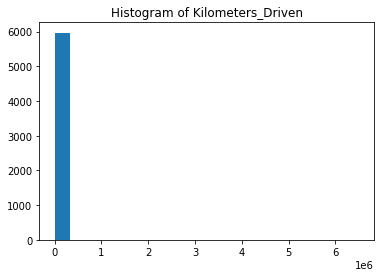

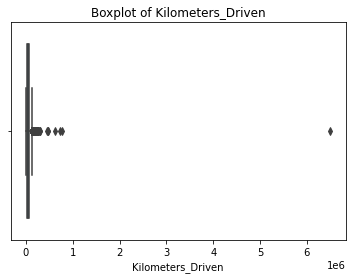

In [26]:
plt.hist(data['Kilometers_Driven'], 20)
plt.title('Histogram of Kilometers_Driven')
plt.show()

sns.boxplot(data=data, x ='Kilometers_Driven')
plt.title('Boxplot of Kilometers_Driven')
plt.show()

In [27]:
quartiles = np.quantile(data['Kilometers_Driven'][data['Kilometers_Driven'].notnull()], [.25, .75])
Kilometers_Driven_5iqr = 5 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 5*IQR = {Kilometers_Driven_5iqr}')
outlier_Kilometers_Driven = data.loc[np.abs(data['Kilometers_Driven'] - data['Kilometers_Driven'].median()) > Kilometers_Driven_5iqr, 'Kilometers_Driven']
outlier_Kilometers_Driven

Q1 = 33908.0, Q3 = 73000.0, 5*IQR = 195460.0


S.No.
29       262000
340      775000
358      620000
1528     299322
1846     255000
1860     720000
1975     282000
2328    6500000
2823     480000
3092     480000
3649     300000
3894     250000
4491     445000
4719     250000
5834     250000
Name: Kilometers_Driven, dtype: int64

In [28]:
data.loc[outlier_Kilometers_Driven.index]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float,Car_brand
S.No.,,,,,,,,,,,,,,,
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.80,2494,102.00,7.0,24.01,4.00,7,toyota
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968,141.00,5.0,25.83,7.50,5,skoda
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197,78.90,5.0,10.25,2.70,5,hyundai
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494,102.00,8.0,24.01,4.00,8,toyota
1846,Toyota Innova 2.5 GX (Diesel) 7 Seater,Pune,2013,255000,Diesel,Manual,Third,12.99,2494,100.60,7.0,24.01,6.50,7,toyota
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598,103.60,5.0,13.23,5.90,5,volkswagen
1975,Skoda Superb 1.8 TSI MT,Pune,2012,282000,Petrol,Manual,First,13.14,1798,160.00,5.0,33.36,3.30,5,skoda
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993,258.00,5.0,55.07,65.00,5,bmw
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968,138.03,5.0,10.15,13.00,5,volkswagen


In [29]:
data.loc[outlier_Kilometers_Driven.index, 'Kilometers_Driven'] = np.nan
data[data['Kilometers_Driven'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float,Car_brand
S.No.,,,,,,,,,,,,,,,
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,NaN,Diesel,Manual,Fourth & Above,12.80,2494,102.00,7.0,24.01,4.00,7,toyota
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,NaN,Diesel,Automatic,First,19.30,1968,141.00,5.0,25.83,7.50,5,skoda
358,Hyundai i10 Magna 1.2,Chennai,2009,NaN,Petrol,Manual,First,20.36,1197,78.90,5.0,10.25,2.70,5,hyundai
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,NaN,Diesel,Manual,First,12.80,2494,102.00,8.0,24.01,4.00,8,toyota
1846,Toyota Innova 2.5 GX (Diesel) 7 Seater,Pune,2013,NaN,Diesel,Manual,Third,12.99,2494,100.60,7.0,24.01,6.50,7,toyota
1860,Volkswagen Vento Diesel Highline,Chennai,2013,NaN,Diesel,Manual,First,20.54,1598,103.60,5.0,13.23,5.90,5,volkswagen
1975,Skoda Superb 1.8 TSI MT,Pune,2012,NaN,Petrol,Manual,First,13.14,1798,160.00,5.0,33.36,3.30,5,skoda
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,NaN,Diesel,Automatic,First,15.97,2993,258.00,5.0,55.07,65.00,5,bmw
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,NaN,Diesel,Automatic,First,16.96,1968,138.03,5.0,10.15,13.00,5,volkswagen


In [30]:
data[(data.Car_brand == 'audi') & (data.Year == 2009)][['Fuel_Type', 'Kilometers_Driven']]

,Fuel_Type,Kilometers_Driven
S.No.,,
611,Diesel,94000.0
849,Diesel,48040.0
964,Diesel,34000.0
2072,Diesel,30000.0
2690,Diesel,55000.0
3601,Diesel,78000.0
4173,Diesel,88000.0
4471,Diesel,52830.0
5039,Petrol,99100.0


In [31]:
data.groupby(['Car_brand', 'Year'])[['Kilometers_Driven','Engine','Price']].median()

Kilometers_Driven  Engine   Price
Car_brand  Year                                   
ambassador 2003            80000.0  1489.0   1.350
audi       2008            50000.0  2967.0  11.500
           2009            52830.0  2698.0   9.950
           2010            36505.5  2698.0  10.750
           2011            57000.0  1968.0  13.950
...                            ...     ...     ...
volvo      2012            53000.0  1985.0  15.125
           2013            61500.0  2192.0  16.825
           2014            86925.0  1984.0  20.000
           2015            38000.0  1984.0  24.000
           2016            42259.0  1984.0  24.360

[315 rows x 3 columns]

In [55]:
data.loc[outlier_Kilometers_Driven.index, 'Kilometers_Driven'].fillna(value = data.groupby(['Car_brand','Year'])['Kilometers_Driven'].transform('median'))

S.No.
29      145000.0
340      65443.0
358      61505.0
1528     81470.5
1846     70000.0
1860     62000.0
1975     64284.0
2328     27001.0
2823     56900.0
3092     45000.0
3649     86000.0
3894    109351.5
4491     54534.0
4719     76007.0
5834     70000.0
Name: Kilometers_Driven, dtype: float64

In [56]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven     15
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Seats_as_float         0
Car_brand              0
New_Price_log          0
Price_log              0
dtype: int64

In [34]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,5
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,7
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,5


### Power

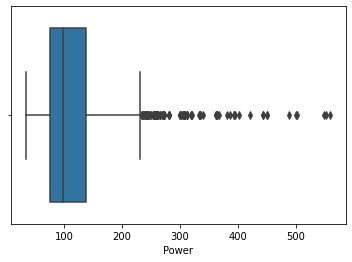

In [35]:
sns.boxplot(data=data, x='Power');

In [65]:
data.groupby(['Car_brand', 'Year'])[['Power']].median()

Power
Car_brand  Year        
ambassador 2003   35.50
audi       2008  241.38
           2009  179.50
           2010  179.50
           2011  147.51
...                 ...
volvo      2012  163.00
           2013  182.50
           2014  190.00
           2015  181.00
           2016  181.00

[314 rows x 1 columns]

### Price

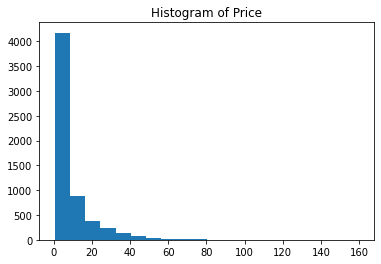

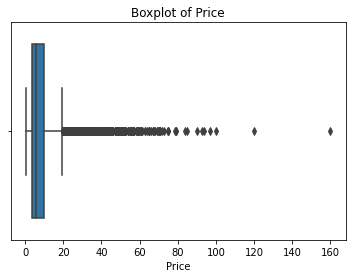

In [36]:
plt.hist(data['Price'], 20)
plt.title('Histogram of Price')
plt.show()

sns.boxplot(data=data, x ='Price')
plt.title('Boxplot of Price')
plt.show()

### Price and Location

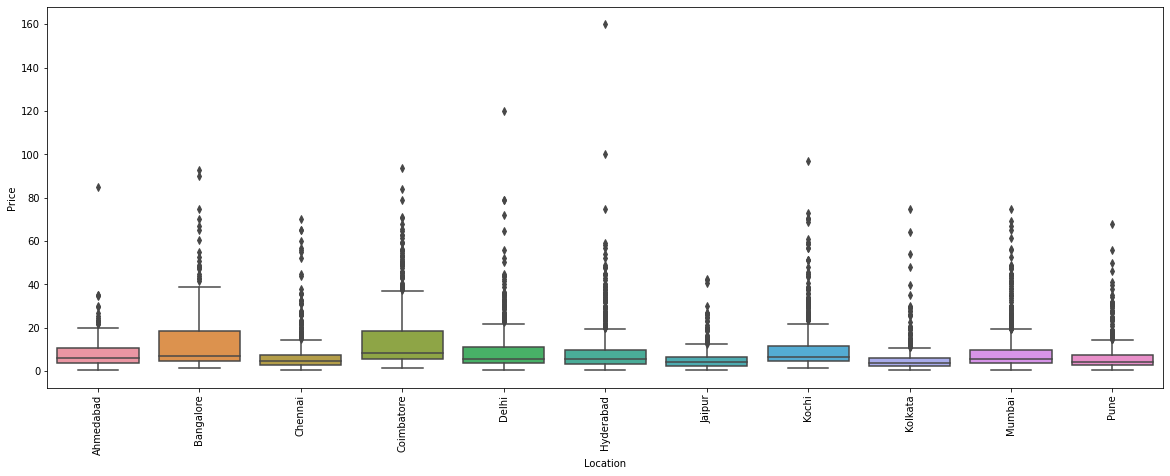

In [37]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data, x='Location', y='Price');
plt.xticks(rotation=90)
plt.show()

In [38]:
data[data['Price'] > 119]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float,Car_brand
S.No.,,,,,,,,,,,,,,,
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000.0,Diesel,Automatic,First,13.33,2993,255.0,5.0,230.0,160.0,5,land
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500.0,Petrol,Automatic,Third,6.40,5204,560.0,2.0,11.3,120.0,2,lamborghini


I will consider removing these two.

In [40]:
data.drop(data[data['Price'] > 119].index, inplace=True)

In [42]:
df.shape

(7200, 14)

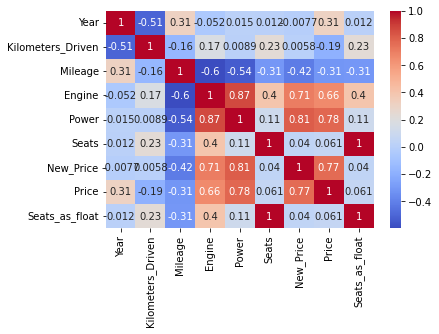

In [43]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True);

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6017 non-null   object  
 1   Location           6017 non-null   object  
 2   Year               6017 non-null   int64   
 3   Kilometers_Driven  6017 non-null   int64   
 4   Fuel_Type          6017 non-null   category
 5   Transmission       6017 non-null   category
 6   Owner_Type         6017 non-null   category
 7   Mileage            6017 non-null   float64 
 8   Engine             5981 non-null   float64 
 9   Power              5874 non-null   float64 
 10  Seats              6017 non-null   float64 
 11  New_Price          6017 non-null   float64 
 12  Price              6017 non-null   float64 
 13  Car_brand          6017 non-null   object  
dtypes: category(3), float64(6), int64(2), object(3)
memory usage: 582.2+ KB


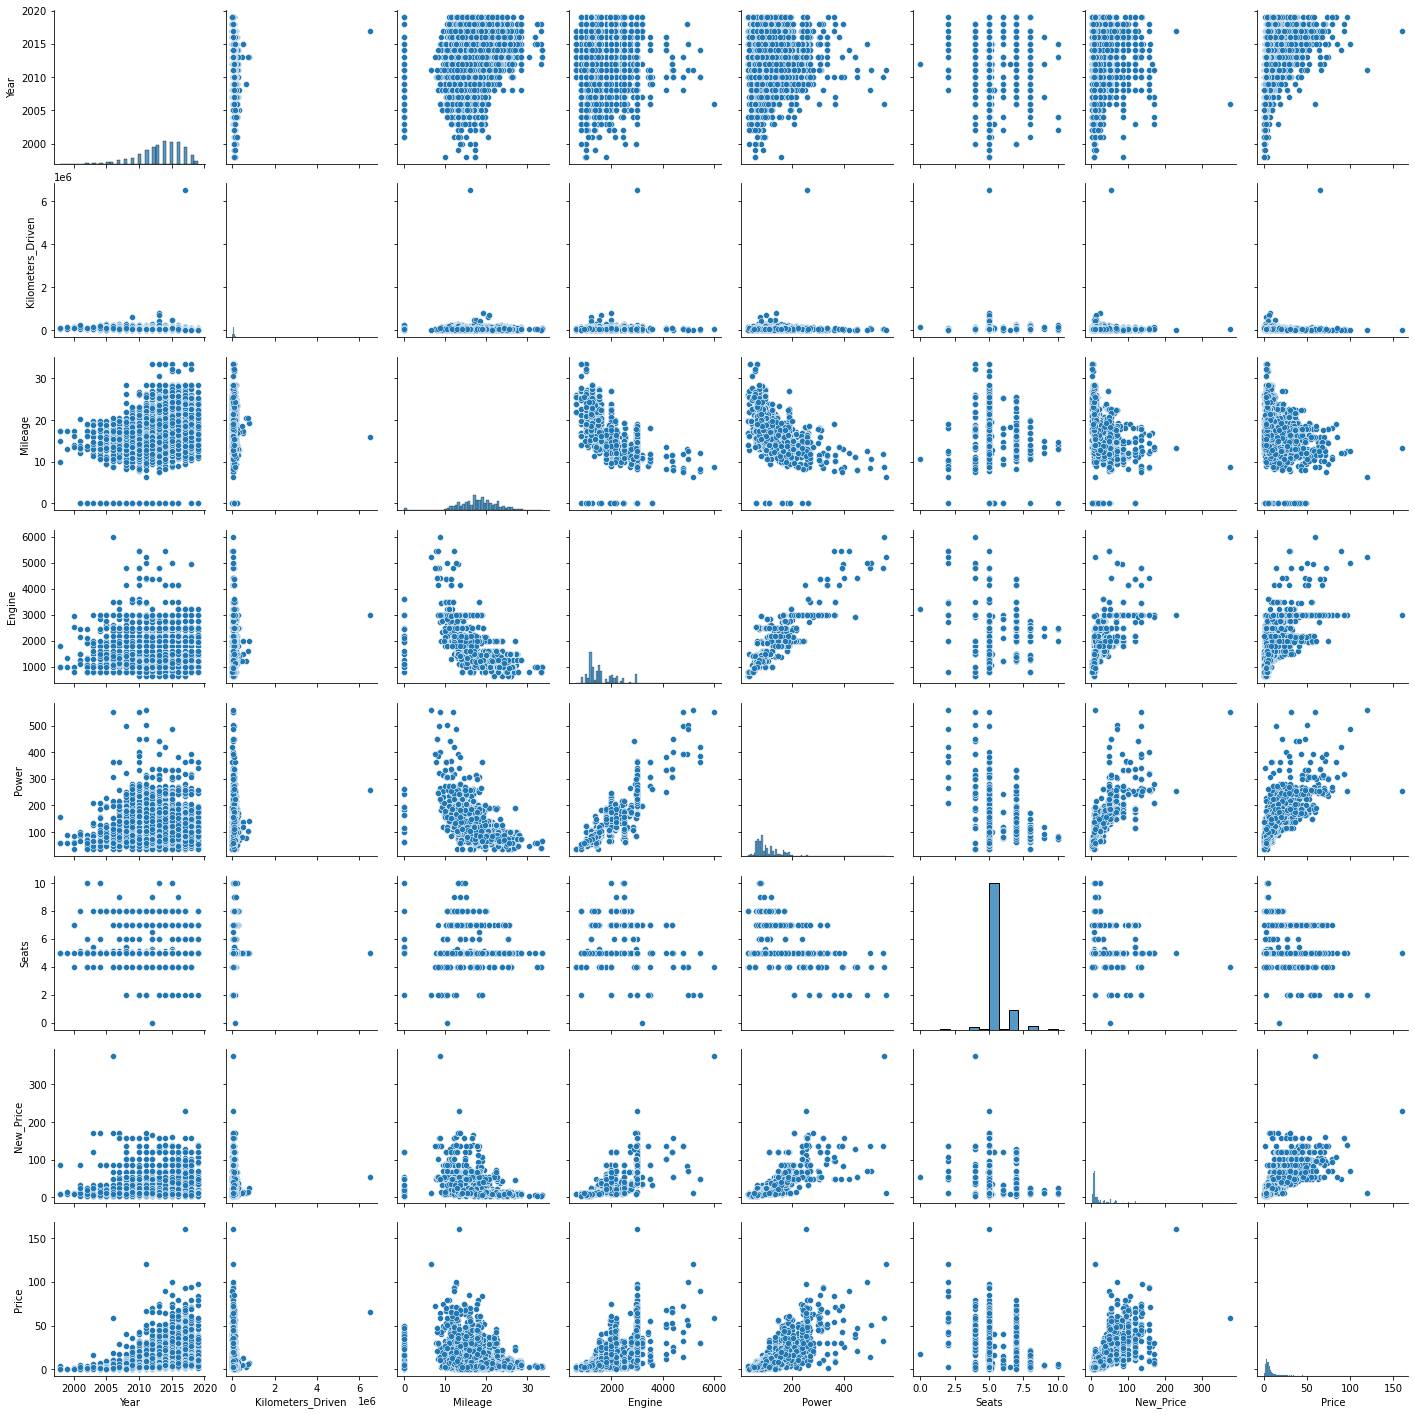

In [149]:
sns.pairplot(data=data);

In [44]:
for cat_var in cat_vars:
    pd.get_dummies(data[cat_var], drop_first=True)

In [45]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Seats_as_float,Car_brand
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998,58.16,5.0,5.51,1.75,5,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582,126.20,5.0,16.06,12.50,5,hyundai
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50,5,honda
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00,7,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968,140.80,5.0,53.14,17.74,5,audi


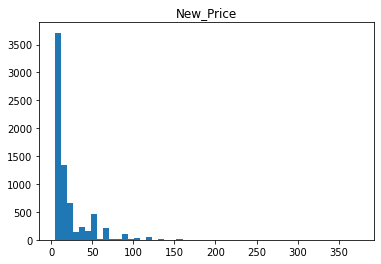

0


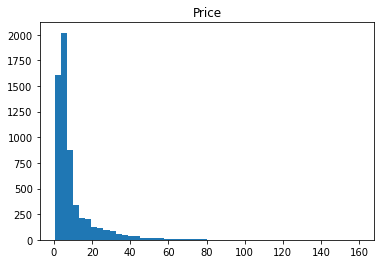

0


In [46]:
cols_to_log = ['New_Price', 'Price']
for colname in cols_to_log:
    plt.hist(data[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(data[colname] <= 0))

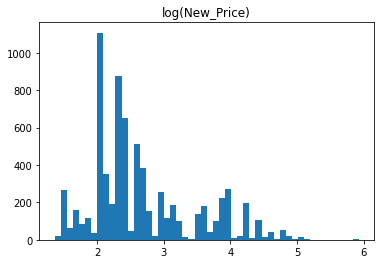

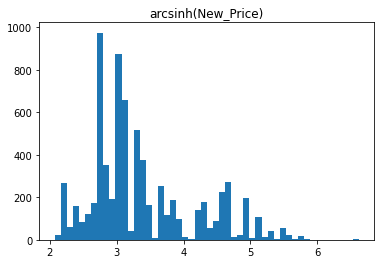

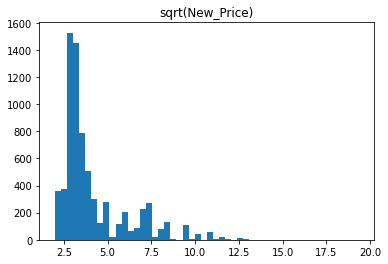

In [51]:
plt.hist(np.log(df['New_Price']), 50)
plt.title('log(New_Price)')
plt.show()
plt.hist(np.arcsinh(df['New_Price']), 50)
plt.title('arcsinh(New_Price)')
plt.show()
plt.hist(np.sqrt(df['New_Price']), 50)
plt.title('sqrt(New_Price)')
plt.show()

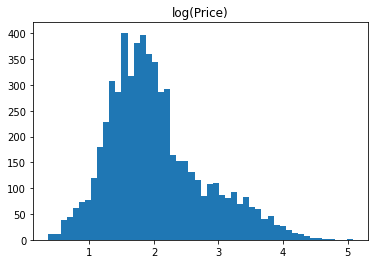

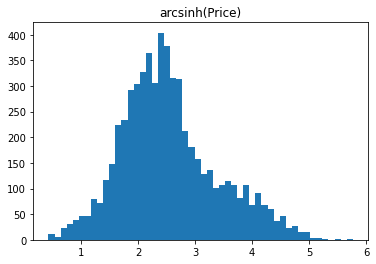

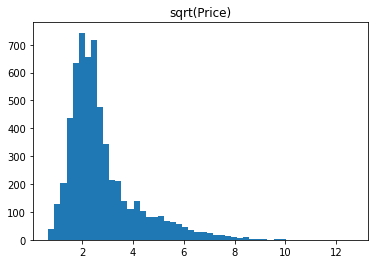

In [50]:
plt.hist(np.log(df['Price'] + 1), 50)
plt.title('log(Price)')
plt.show()
plt.hist(np.arcsinh(df['Price']), 50)
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(df['Price']), 50)
plt.title('sqrt(Price)')
plt.show()

In [52]:
for colname in cols_to_log:
    data[colname + '_log'] = np.log(data[colname] + 1)
data.drop(cols_to_log, axis=1, inplace=True)

In [53]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Seats_as_float,Car_brand,New_Price_log,Price_log
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998,58.16,5.0,5,maruti,1.873339,1.011601
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582,126.20,5.0,5,hyundai,2.836737,2.602690
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199,88.70,5.0,5,honda,2.262804,1.704748
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248,88.76,7.0,7,maruti,2.507157,1.945910
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968,140.80,5.0,5,audi,3.991573,2.930660


In [54]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven     15
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Seats_as_float         0
Car_brand              0
New_Price_log          0
Price_log              0
dtype: int64

In [59]:
data.loc[outlier_Kilometers_Driven.index, 'Kilometers_Driven'] = data.loc[outlier_Kilometers_Driven.index, 'Kilometers_Driven'].fillna(value = data.groupby(['Car_brand','Year'])['Kilometers_Driven'].transform('median'))
# data['Kilometers_Driven'] = df.Kilometers_Driven

In [62]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Seats_as_float         0
Car_brand              0
New_Price_log          0
Price_log              0
dtype: int64

In [64]:
data[~data.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Seats_as_float,Car_brand,New_Price_log,Price_log
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,5,maruti,1.873339,1.011601
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,5,hyundai,2.836737,2.602690
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,5,honda,2.262804,1.704748
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,7,maruti,2.507157,1.945910
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,5,audi,3.991573,2.930660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,5,maruti,2.183802,1.749200
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,5,hyundai,2.222459,1.609438
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,8,mahindra,2.539237,1.360977
